### Moore's Law
In this Jupyter Notebook, I explore the Moore's Law data set showing the number of transistors in different CPUs, along with the year they were released. This law originated around 1970, and states that processor speeds, or overall processing power for computers will double every two years.

Fit a linear regression model to this data set to show that Moore's Law is more or less true.

In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
moore = pd.read_csv("moore.csv", sep='\t', header = None)
moore

,0,1,2,3,4,5
0,Intel 4004,"2,300",1971,Intel,"10,000 nm",12 mm²
1,Intel 8008,"3,500",1972,Intel,"10,000 nm",14 mm²
2,Intel 8080,"4,500",1974,Intel,"6,000 nm",20 mm²
3,Motorola 6800,"4,100",1974,Motorola,"6,000 nm",16 mm²
4,RCA 1802,"5,000",1974,RCA,"5,000 nm",27 mm²
5,TMS 1000,"8,000",1974[7],Texas Instruments,"8,000 nm",NaN
6,MOS Technology 6502,"3,510[8]",1975,MOS Technology,"8,000 nm",21 mm²
7,Intel 8085,"6,500",1976,Intel,"3,000 nm",20 mm²
8,Zilog Z80,"8,500",1976,Zilog,"4,000 nm",18 mm²
9,Intel 8086,"29,000",1978,Intel,"3,000 nm",33 mm²


In [1]:
def clean_moore(x):
    count = x.split("[")[0]  
    return count

In [4]:
# To rename columns title, I have created dictionaries, the default titles and assigned the appropriate titles

moore.rename(columns = {0: "CPU", 1: "Transistor Count", 2: "Year", 3:"Manifacturer",4:"Newton Meters", 5:"Area"}, inplace = True)
moore

,CPU,Transistor Count,Year,Manifacturer,Newton Meters,Area
0,Intel 4004,"2,300",1971,Intel,"10,000 nm",12 mm²
1,Intel 8008,"3,500",1972,Intel,"10,000 nm",14 mm²
2,Intel 8080,"4,500",1974,Intel,"6,000 nm",20 mm²
3,Motorola 6800,"4,100",1974,Motorola,"6,000 nm",16 mm²
4,RCA 1802,"5,000",1974,RCA,"5,000 nm",27 mm²
5,TMS 1000,"8,000",1974[7],Texas Instruments,"8,000 nm",NaN
6,MOS Technology 6502,"3,510[8]",1975,MOS Technology,"8,000 nm",21 mm²
7,Intel 8085,"6,500",1976,Intel,"3,000 nm",20 mm²
8,Zilog Z80,"8,500",1976,Zilog,"4,000 nm",18 mm²
9,Intel 8086,"29,000",1978,Intel,"3,000 nm",33 mm²


In [5]:
# some numbers have references in square brackets after them in the Transistor Count column
# to clean our data i decide to drop the square brakets and usning the fellowing function

moore["Transistor Count"]= [clean_moore(x) for x in moore["Transistor Count"]]

In [6]:
# some numbers have references in square brackets after them in the Year column
# to clean our data I decided to drop the square brakets and usning the fellowing function

moore["Year"].iloc[5]

'1974[7]'

In [7]:
moore["Year"].iloc[5] = '1974'

In [8]:
moore["Year"].iloc[20]

'1985[13]'

In [9]:
moore["Year"].iloc[20] = '1985'
moore

,CPU,Transistor Count,Year,Manifacturer,Newton Meters,Area
0,Intel 4004,"2,300",1971,Intel,"10,000 nm",12 mm²
1,Intel 8008,"3,500",1972,Intel,"10,000 nm",14 mm²
2,Intel 8080,"4,500",1974,Intel,"6,000 nm",20 mm²
3,Motorola 6800,"4,100",1974,Motorola,"6,000 nm",16 mm²
4,RCA 1802,"5,000",1974,RCA,"5,000 nm",27 mm²
5,TMS 1000,"8,000",1974,Texas Instruments,"8,000 nm",NaN
6,MOS Technology 6502,"3,510",1975,MOS Technology,"8,000 nm",21 mm²
7,Intel 8085,"6,500",1976,Intel,"3,000 nm",20 mm²
8,Zilog Z80,"8,500",1976,Zilog,"4,000 nm",18 mm²
9,Intel 8086,"29,000",1978,Intel,"3,000 nm",33 mm²


In [10]:
X = []
Y = []

In [11]:
# some numbers show up as 1,170,000,000 (commas)
# some numbers have references in square brackets after them

non_decimal = re.compile(r'[^\d]+')

In [12]:

for line in open('moore.csv'):
    r = line.split('\t')
    
    x = int(non_decimal.sub('', r[2].split('[')[0]))
    y = int(non_decimal.sub('', r[1].split('[')[0]))
    X.append(x)
    Y.append(y)

In [13]:
X = np.array(X)
Y = np.array(Y)

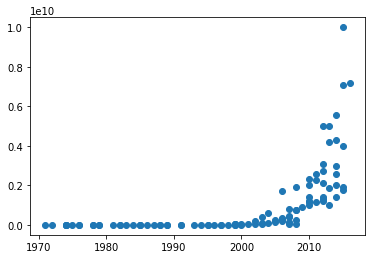

In [14]:
plt.scatter(X, Y)
plt.show()

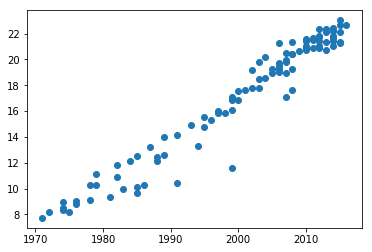

In [15]:
# Let's fit our model

Y = np.log(Y)
plt.scatter(X, Y)
plt.show()

In [16]:
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator


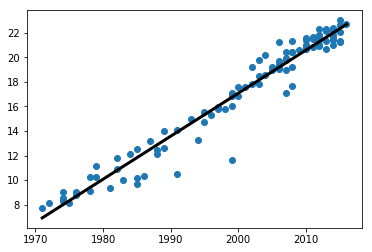

In [17]:
# # let's calculate the predicted Y and then visualize our model fit

Yhat = a*X + b
plt.scatter(X, Y)
plt.plot(X, Yhat, color = "black", linewidth = 3)
plt.show()

In [18]:
# To determine how good the model is by computing the r-squared

d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("The r-squared is: {}".format(r2))

The r-squared is: 0.952944285228576
